# Сбор данных

Первый этап любой работы с данными - это их сбор. Тут возможны варианты в зависимости от ситуации и от глобальной задачи. Три общих подхода к сбору данных на Python:
1. скрейпинг, т.е. извлечение данных с веб-страниц
2. парсинг данных по API
3. использование уже написанных библиотек
4. сбор собственного корпуса вручную

# Упражнение 1. Работа с API

Есть проект "Конструктор ОП" http://op.itmo.ru

## Задание 1.0

Доступ к контенту появляется после регистрации. Можно войти через ИСУ, первый вход = регистрация. Для целей лабораторной работы можно либо создать пользователя, либо воспользоваться тестовым.

В процессе работы нужно будет получить данные по API. Собрать по этим данным датасет (например, можно воспользоваться библиотекой pandas). После провести первичный анализ и сделать визуализации.

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://op.itmo.ru/auth/token/login"
auth_data = {"username": "analytic", "password": "datatest"}

In [ ]:
token_txt = requests.post(url, auth_data).text
print(token_txt)

{"auth_token":"0d07b2771ba4f51c2d29af2a1dcfc38ebf4728cc"}


In [ ]:
token = json.loads(token_txt)["auth_token"]
print(token)
headers = {'Content-Type': "application/json", 'Authorization': "Token " + token}

0d07b2771ba4f51c2d29af2a1dcfc38ebf4728cc


## Задание 1.1 Получить идентификаторы всех учебных планов, имеющихся в op.itmo.ru

In [ ]:
education_plans_url = "https://op.itmo.ru/api/record/academic_plan/academic_wp_description/all"
response = requests.get(education_plans_url, headers=headers)
data = response.json()
print(data)
print(f'Page: 1 was extracted')

{'count': 738, 'next': 'http://op.itmo.ru/api/record/academic_plan/academic_wp_description/all?page=2', 'previous': None, 'results': [{'id': 6796, 'academic_plan_in_field_of_study': [{'id': 6859, 'ap_isu_id': 10572, 'year': 2018, 'title': 'Нанофотоника и квантовая оптика'}], 'wp_in_academic_plan': [{'id': 2623, 'discipline_code': '5546', 'title': 'История', 'description': None, 'status': 'WK'}, {'id': 2625, 'discipline_code': '5664', 'title': 'Физическая культура', 'description': None, 'status': 'WK'}, {'id': 2635, 'discipline_code': '13873', 'title': 'Иностранный язык', 'description': 'Целью освоения дисциплины является достижение следующих результатов обучения: - Знание основ построения основных жанров письменных текстов академической и деловой сферы. - Знание норм композиционного, стилистического и технического оформления письменного текста на иностранном языке. - Умение использовать различные формы и виды письменной коммуникации на иностранном языке в ситуациях профессиональн', 'st

In [ ]:
pretty_json_example = json.dumps(data["results"][:1], indent=1,ensure_ascii=False)
print(pretty_json_example)

[
 {
  "id": 6796,
  "academic_plan_in_field_of_study": [
   {
    "id": 6859,
    "ap_isu_id": 10572,
    "year": 2018,
    "title": "Нанофотоника и квантовая оптика"
   }
  ],
  "wp_in_academic_plan": [
   {
    "id": 2623,
    "discipline_code": "5546",
    "title": "История",
    "description": null,
    "status": "WK"
   },
   {
    "id": 2625,
    "discipline_code": "5664",
    "title": "Физическая культура",
    "description": null,
    "status": "WK"
   },
   {
    "id": 2635,
    "discipline_code": "13873",
    "title": "Иностранный язык",
    "description": "Целью освоения дисциплины является достижение следующих результатов обучения: - Знание основ построения основных жанров письменных текстов академической и деловой сферы. - Знание норм композиционного, стилистического и технического оформления письменного текста на иностранном языке. - Умение использовать различные формы и виды письменной коммуникации на иностранном языке в ситуациях профессиональн",
    "status": "RE"
   

In [ ]:
full_data = [data]
url = data['next']
page = 1
max_pages = 75
while url is not None and page < max_pages:
  page += 1
  part_data = requests.get(url, headers=headers).json()
  full_data.append(part_data)
  print(f'Page: {page} was extracted')
  url = part_data.get('next')

print(f'All pages was extracted pages: {page}')
print(full_data)
#21m 24s

Page: 2 was extracted
Page: 3 was extracted
Page: 4 was extracted
Page: 5 was extracted
Page: 6 was extracted
Page: 7 was extracted
Page: 8 was extracted
Page: 9 was extracted
Page: 10 was extracted
Page: 11 was extracted
Page: 12 was extracted
Page: 13 was extracted
Page: 14 was extracted
Page: 15 was extracted
Page: 16 was extracted
Page: 17 was extracted
Page: 18 was extracted
Page: 19 was extracted
Page: 20 was extracted
Page: 21 was extracted
Page: 22 was extracted
Page: 23 was extracted
Page: 24 was extracted
Page: 25 was extracted
Page: 26 was extracted
Page: 27 was extracted
Page: 28 was extracted
Page: 29 was extracted
Page: 30 was extracted
Page: 31 was extracted
Page: 32 was extracted
Page: 33 was extracted
Page: 34 was extracted
Page: 35 was extracted
Page: 36 was extracted
Page: 37 was extracted
Page: 38 was extracted
Page: 39 was extracted
Page: 40 was extracted
Page: 41 was extracted
Page: 42 was extracted
Page: 43 was extracted
Page: 44 was extracted
Page: 45 was extrac

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Обратите внимание, что у плана есть два разных id. Вам нужно разобраться, какой именно id нужно использовать для следующего пункта задания.


In [ ]:
all_ids_of_academic_plan = [
    item["academic_plan_in_field_of_study"][0]["id"]
    for part in full_data
    for item in part.get("results", [])
    if item.get("academic_plan_in_field_of_study")
    ]
print(len(all_ids_of_academic_plan))
print(all_ids_of_academic_plan)

738
[6859, 6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6885, 6886, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6908, 6909, 6910, 7657, 6912, 7658, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6930, 6931, 6932, 6933, 6934, 6935, 6936, 6937, 6938, 6939, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6984, 6985, 6986, 6987, 6988, 6989, 6990, 6993, 6994, 6907, 6995, 6996, 6997, 6998, 6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7010, 7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7020, 7021, 7022, 7023, 7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034,

## Задание 1.2 По этим планам получить детальное описание

Планов очень много. Скачивать нужно только планы 2023 и 2024 года набора.

('results' -> 'academic_plan_in_field_of_study' -> 'year')

In [ ]:
filtered_by_years = [
    item
    for part in full_data
    for item in part["results"]
    if item["academic_plan_in_field_of_study"][0]["year"] in [2023,2024]
]
years = [item["academic_plan_in_field_of_study"][0]["year"] for part in full_data for item in part["results"] ]
print("years:>", years)
print("total plans:>", len(years))
print("total filtered:>", len(filtered_by_years))

ids_plans_2023_2024 = [plan["id"] for plan in filtered_by_years]
print("filtred ids:>", ids_plans_2023_2024)
print("total filtred ids:>", len(ids_plans_2023_2024))

years:> [2018, 2018, 2021, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2020, 2020, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2020, 2020, 2019, 2019, 2019, 2020, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2020, 2020, 2019, 2023, 2020, 2023, 2019, 2020, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2019, 2019, 2019, 2021, 2019, 2021, 2019, 2021, 2019, 2019, 2020, 2021, 2019, 2019, 2019, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2019, 2019, 2021, 2020, 2020, 2021, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2018, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2

In [ ]:
plan_detail_data = []
count = 0
for id in ids_plans_2023_2024:
  plan_detail_url = f'https://op.itmo.ru/api/academicplan/detail/{id}'
  plan_detail = requests.get(plan_detail_url, headers=headers).json()
  count += 1
  print(f':> extracted {count} detail plan')
  plan_detail_data.append(plan_detail)

print(plan_detail_data)
#147m 07s

:> extracted 1 detail plan
:> extracted 2 detail plan
:> extracted 3 detail plan
:> extracted 4 detail plan
:> extracted 5 detail plan
:> extracted 6 detail plan
:> extracted 7 detail plan
:> extracted 8 detail plan
:> extracted 9 detail plan
:> extracted 10 detail plan
:> extracted 11 detail plan
:> extracted 12 detail plan
:> extracted 13 detail plan
:> extracted 14 detail plan
:> extracted 15 detail plan
:> extracted 16 detail plan
:> extracted 17 detail plan
:> extracted 18 detail plan
:> extracted 19 detail plan
:> extracted 20 detail plan
:> extracted 21 detail plan
:> extracted 22 detail plan
:> extracted 23 detail plan
:> extracted 24 detail plan
:> extracted 25 detail plan
:> extracted 26 detail plan
:> extracted 27 detail plan
:> extracted 28 detail plan
:> extracted 29 detail plan
:> extracted 30 detail plan
:> extracted 31 detail plan
:> extracted 32 detail plan
:> extracted 33 detail plan
:> extracted 34 detail plan
:> extracted 35 detail plan
:> extracted 36 detail plan
:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pretty_detail_plan = json.dumps(plan_detail_data[0], indent=1, ensure_ascii=False)
print(pretty_detail_plan)

print(len(plan_detail_data))

{
 "id": 7504,
 "educational_profile": "Робототехника и искусственный интеллект / Robotics and artificial intelligence",
 "number": null,
 "approval_date": "2023-10-06T11:11:04.613383Z",
 "discipline_blocks_in_academic_plan": [
  {
   "id": 30066,
   "name": "Блок 1. Модули (дисциплины)",
   "modules_in_discipline_block": [
    {
     "id": 166667,
     "name": "Включенное обучение / Exchange Students",
     "type": "faculty_module",
     "change_blocks_of_work_programs_in_modules": [
      {
       "id": 985915,
       "code": null,
       "credit_units": null,
       "change_type": "Required",
       "work_program": [
        {
         "id": 18480,
         "wp_in_fs_id": 1169598,
         "approval_date": "2021-04-16T09:46:32.700131Z",
         "authors": "Томашевич С.И., доцент практики , ФСУиР",
         "discipline_code": "17043",
         "title": "Программирование роботов / Robot Programming",
         "qualification": "master",
         "hoursFirstSemester": null,
         "h

Структура ответа: 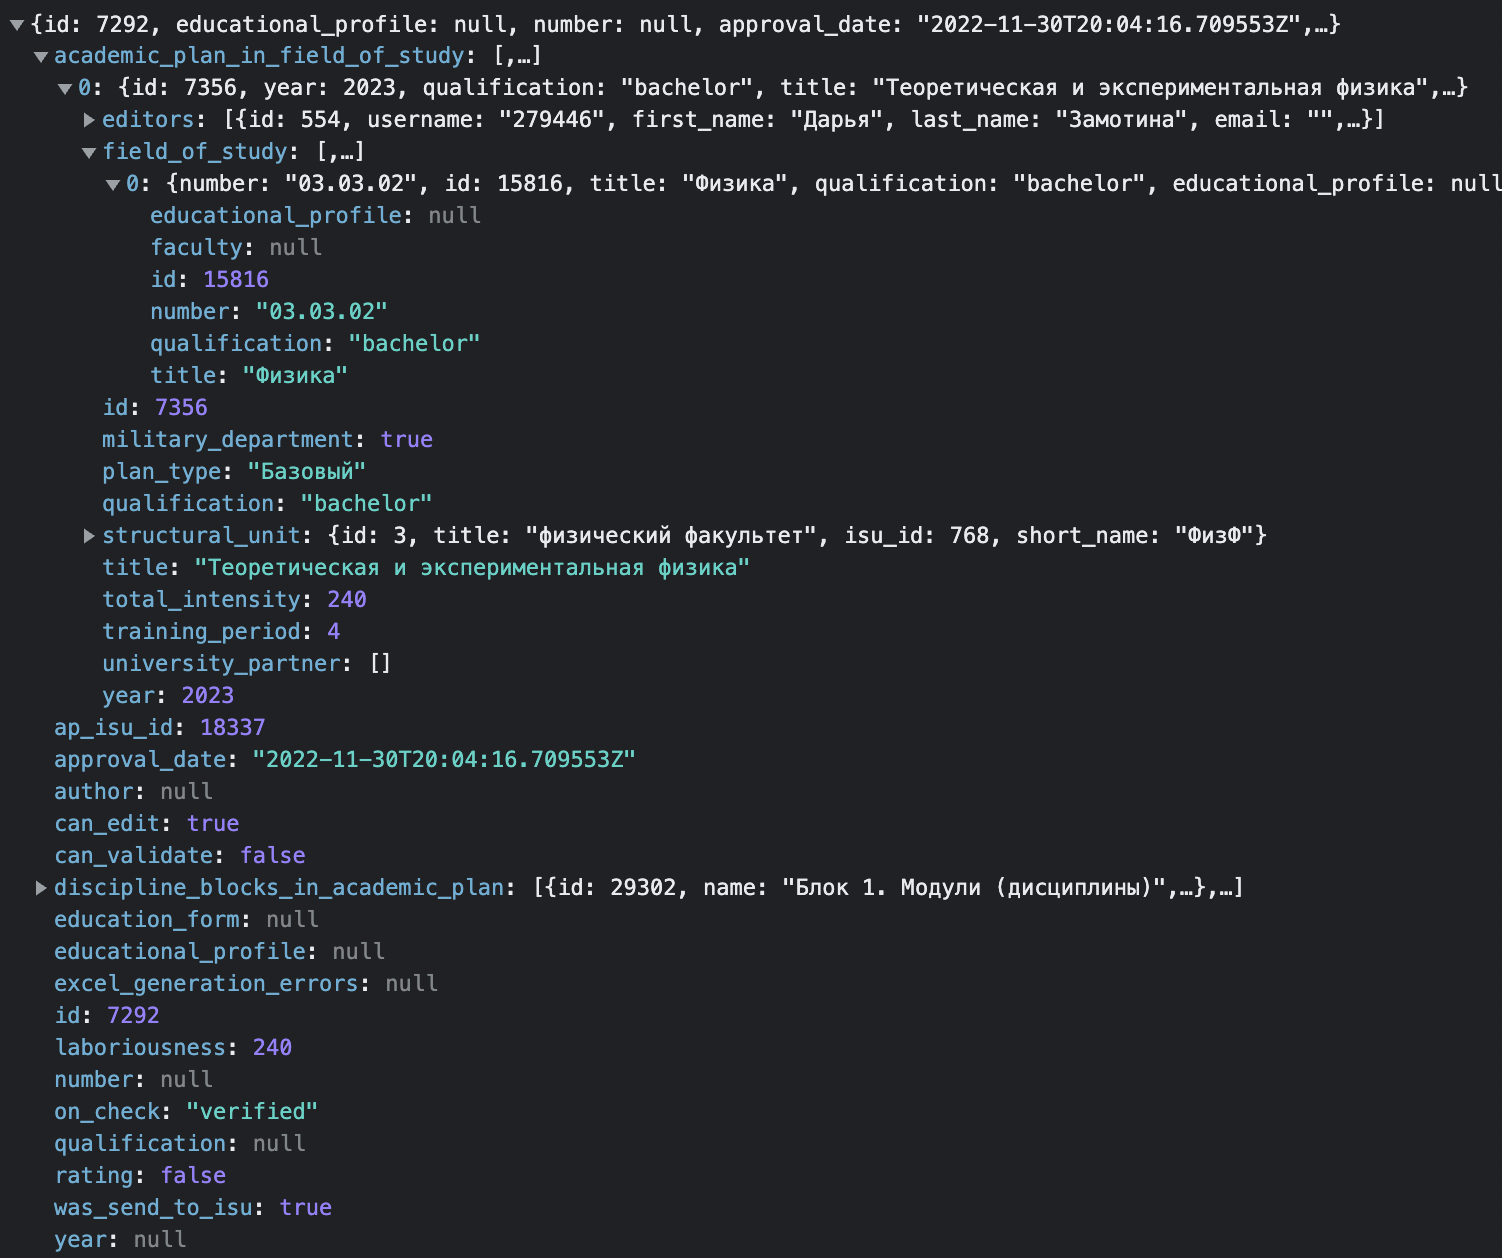

На основе описаний сделать датасет, состоящий из одной или нескольких таблиц. Добавить время скачивания.

Учтите, что количество планов около 300, скачиваться может довольно долго.

## Задание 1.3 Построить графики и проанализировать

Построить графики: количество планов по годам набора, квалификациям (field_of_stude -> 0 -> qualification), структурным подразделениям (structural unit -> title или short_title) и количеству редакторов.

Для планов 2023 и 2024 годов набора построить график с распределением статусов (on_check).

In [ ]:
rows = []
for plan in plan_detail_data:
  try:
    plan_id = plan['id']
  except TypeError:
    plan_id = None
  try:
    year = plan['academic_plan_in_field_of_study'][0]['year']
  except (IndexError, TypeError):
    year = None
  try:
    qualification = plan['academic_plan_in_field_of_study'][0]['field_of_study'][0]['qualification']
  except (IndexError, TypeError):
    qualification = None
  try:
    structural_unit = plan['academic_plan_in_field_of_study'][0]['structural_unit']['title']
  except (IndexError, TypeError):
    structural_unit = None
  try:
    editors_count = len(plan['academic_plan_in_field_of_study'][0]['editors'])
  except (IndexError, TypeError):
    editors_count = None

  rows.append({
      'plan_id': plan_id,
      'year': year,
      'qualification': qualification,
      'structural_unit': structural_unit,
      'editors_count': editors_count
  })

df = pd.DataFrame(rows)
df.head()

,plan_id,year,qualification,structural_unit,editors_count
0,7504,2023,None,None,0
1,7505,2023,bachelor,None,2
2,7336,2023,master,институт прикладных компьютерных наук,7
3,7334,2023,master,факультет программной инженерии и компьютерной...,4
4,7327,2023,master,факультет цифровых трансформаций,2


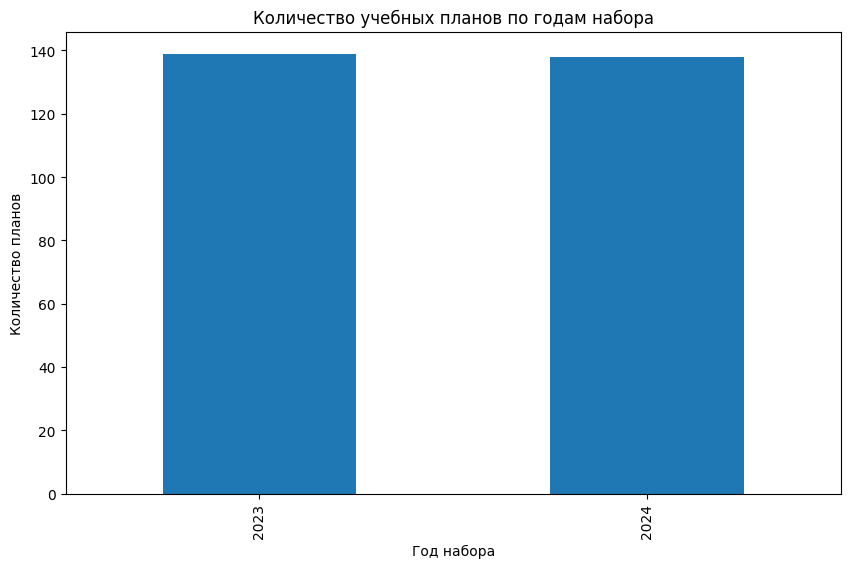

In [ ]:
yearly_plans_count = df.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_plans_count.plot(kind='bar')
plt.title('Количество учебных планов по годам набора')
plt.xlabel('Год набора')
plt.ylabel('Количество планов')
plt.show()

По данному графику можно сделать выводы:

Количество учебных планов за 2023 и 2024 год примерно равно.
Количество учебных планов за 2023 меньше 140 и больше 130. Также можно сделать другие пободные выводы.

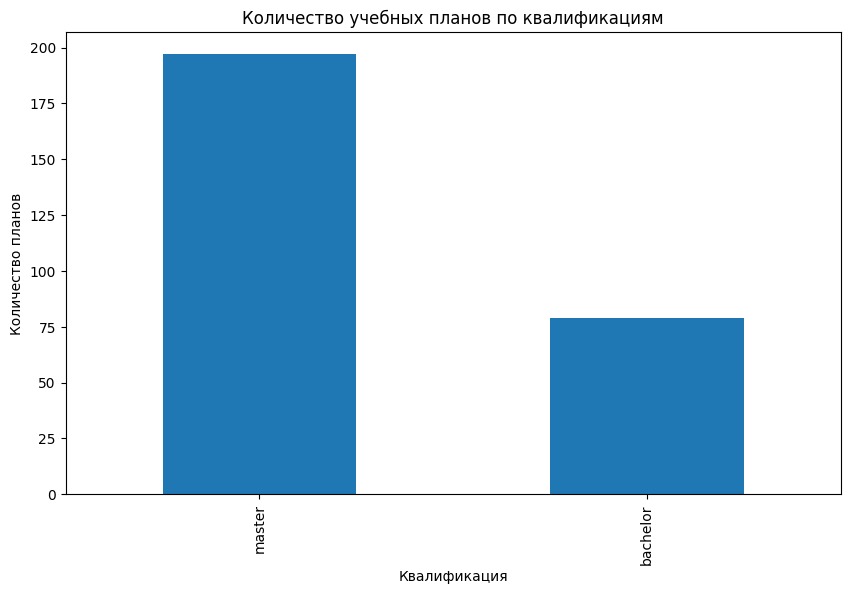

In [ ]:
qualification_plans_count = df['qualification'].value_counts()

plt.figure(figsize=(10, 6))
qualification_plans_count.plot(kind='bar')
plt.title('Количество учебных планов по квалификациям')
plt.xlabel('Квалификация')
plt.ylabel('Количество планов')
plt.show()

По данному графику можно сделать выводы:

Большеe количество учебных планов в магистратуре в сравнении с бакалавриатом.
Можно узнать точное количество учебных планов в магистратуре и бакалавриате. Также можно сделать другие пободные выводы.

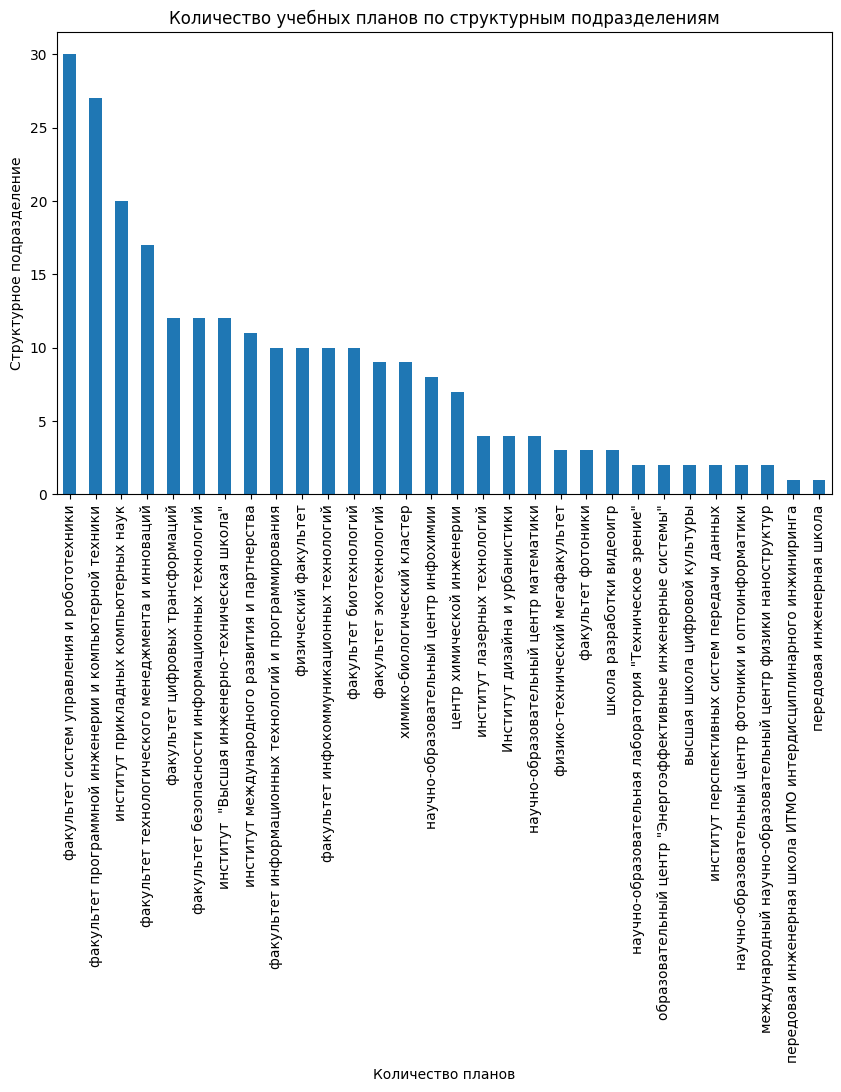

In [ ]:
structural_unit_plans_count = df['structural_unit'].value_counts()

plt.figure(figsize=(10, 6))
structural_unit_plans_count.plot(kind='bar')
plt.title('Количество учебных планов по структурным подразделениям')
plt.xlabel('Количество планов')
plt.ylabel('Структурное подразделение')
plt.show()

По данному графику можно сделать выводы:

Наибольшее количество учебных планов на СУИРе, а именно таких планов 30.

Учебных планов на физическом факультете больше чем на факультете фотоники. Также можно сделать другие пободные выводы.

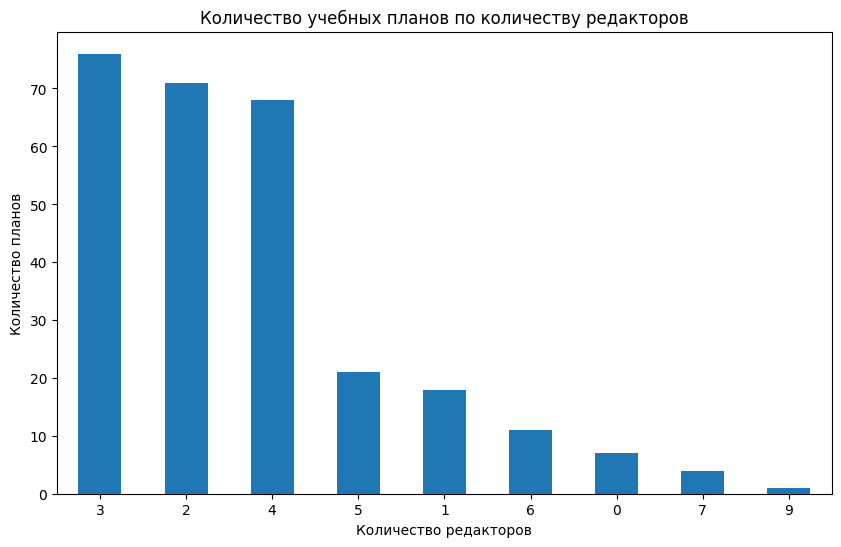

In [ ]:
editors_count_plans_count = df['editors_count'].value_counts()

plt.figure(figsize=(10, 6))
editors_count_plans_count.plot(kind='bar', rot=0)
plt.title('Количество учебных планов по количеству редакторов')
plt.xlabel('Количество редакторов')
plt.ylabel('Количество планов')
plt.show()

По данному графику можно сделать выводы:

Большее количество учебных планов с количеством редакторов - равное трем.  
Есть учебные планы, где не указаны редакторы(их количество 0). Также можно сделать другие пободные выводы.

## Задание 1.4 Анализ


Найдите планы со статусом проверенные ('verified') , у которых некорректная трудоемкость (laboriousness). Корректная трудоемкость для бакалавриата - 240, для магистратуры - 120.

Для таких планов выведите год набора, id плана, ИСУ ИД плана (это уже третий id плана, и он всегда состоит из 5 цифр), название структурного подразделения (structural unit -> title) и список редакторов (editors)

In [ ]:
rows = []
for plan in plan_detail_data:
  try:
    qualification = plan['academic_plan_in_field_of_study'][0]['field_of_study'][0]['qualification']
  except (IndexError, TypeError):
    qualification = None
  if plan['on_check'] == 'verified':
    if qualification == 'master':
      #incorrect
      if plan['laboriousness'] != 120:
        try:
          year = plan['academic_plan_in_field_of_study'][0]['year']
        except (IndexError, TypeError):
          year = None
        try:
          id = plan['id']
        except (TypeError):
          id = None
        try:
          isu_id = plan['ap_isu_id']
        except (TypeError):
          isu_id = None
        try:
          structural_unit = plan['academic_plan_in_field_of_study'][0]['structural_unit']['title']
        except (IndexError, TypeError):
          structural_unit = None
        try:
          editors = plan['academic_plan_in_field_of_study'][0]['editors']
        except (IndexError, TypeError):
          editors = []
        rows.append({
            'year': year,
            'id': id,
            'isu_id': isu_id,
            'qualification': qualification,
            'structural_unit': structural_unit,
            'editors': editors
        })
    elif qualification == 'bachelor':
      if plan['laboriousness'] != 240:
        #incorrect
        try:
          year = plan['academic_plan_in_field_of_study'][0]['year']
        except (IndexError, TypeError):
          year = None
        try:
          id = plan['id']
        except (TypeError):
          id = None
        try:
          isu_id = plan['ap_isu_id']
        except (TypeError):
          isu_id = None
        try:
          structural_unit = plan['academic_plan_in_field_of_study'][0]['structural_unit']['title']
        except (IndexError, TypeError):
          structural_unit = None
        try:
          editors = plan['academic_plan_in_field_of_study'][0]['editors']
        except (IndexError, TypeError):
          editors = []
        rows.append({
            'year': year,
            'id': id,
            'isu_id': isu_id,
            'qualification': qualification,
            'structural_unit': structural_unit,
            'editors': editors
        })
    else:
      continue
  else:

    continue
df_incorrect = pd.DataFrame(rows)
df_incorrect.head(20)


   year    id  isu_id qualification  \
0  2023  7401   18397        master   
1  2023  7390   18405        master   
2  2023  7386   18416        master   
3  2023  7315   18361      bachelor   
4  2023  7321   18366      bachelor   
5  2023  7294   18340      bachelor   
6  2023  7500   28097      bachelor   
7  2023  7385   18414        master   
8  2023  7316   18362      bachelor   
9  2023  7297   18343      bachelor   

                                  structural_unit  \
0  институт международного развития и партнерства   
1                         факультет биотехнологий   
2                         факультет экотехнологий   
3          научно-образовательный центр инфохимии   
4  институт международного развития и партнерства   
5                         факультет экотехнологий   
6       факультет инфокоммуникационных технологий   
7                         факультет экотехнологий   
8                         факультет биотехнологий   
9       факультет инфокоммуникационных т